In [1]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('housing.csv')

In [48]:
data.shape

(20640, 10)

In [4]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# EDA

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

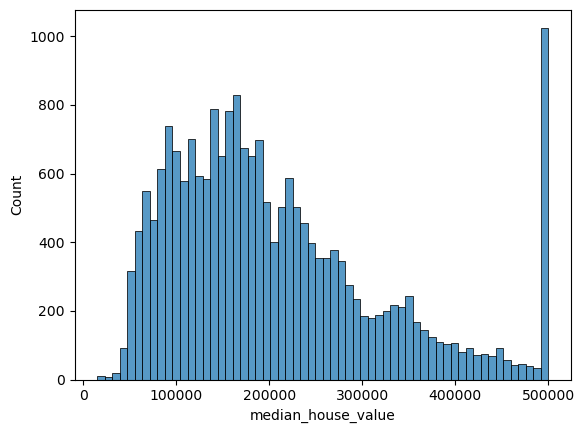

In [14]:
sns.histplot(data.median_house_value, bins=60)

The median_house_value variable does have a long tail. Apply log-transformation

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

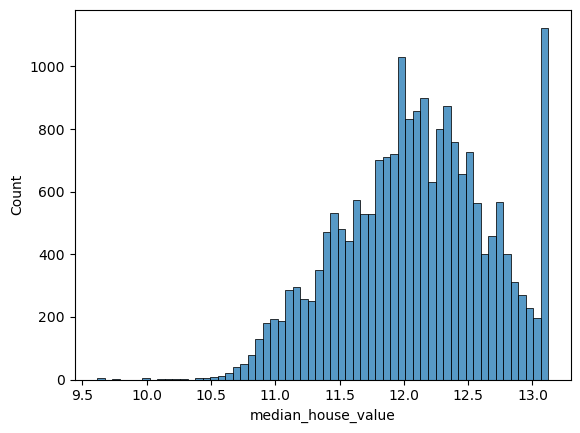

In [62]:
sns.histplot(np.log1p(data.median_house_value), bins=60)

In [18]:
features_to_use = ['latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
        'population', 'households', 'median_income', 'median_house_value']

In [20]:
data_explore = data[features_to_use]

In [21]:
data_explore.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


Question 1. Find a feature with missing values. How many missing values does it have?

In [127]:
num_of_missig_values = data_explore.isnull().sum()
num_of_missig_values

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

Feature 'total_bedrooms' has 207 missing values

Question 2. What's the median (50% percentile) for variable 'population'?

In [39]:
population_median = data_explore.population.median()
population_median

1166.0

Spliting the data

In [47]:
n = data_explore.shape[0]
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 20637, 20638, 20639])

In [49]:
np.random.seed(42)
np.random.shuffle(idx)

In [50]:
idx

array([20046,  3024, 15663, ...,  5390,   860, 15795])

In [51]:
n_train = int(0.6 * n)
n_val = int(0.2 * n)
n_test = n - n_train - n_val
n_train, n_val, n_test

(12384, 4128, 4128)

In [52]:
data_train = data_explore.iloc[idx[:n_train]]
data_val = data_explore.iloc[idx[n_train:n_train+n_val]]
data_test = data_explore.iloc[idx[n_train+n_val:]]

In [53]:
len(data_train), len(data_val), len(data_test)

(12384, 4128, 4128)

In [55]:
data_train = data_train.reset_index(drop=True)
data_val = data_val.reset_index(drop=True)
data_test = data_test.reset_index(drop=True)

In [60]:
data_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,36.06,-119.01,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0
1,35.14,-119.46,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0
2,37.80,-122.44,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0
3,34.28,-118.72,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0
4,36.62,-121.93,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0


In [63]:
y_train = np.log1p(data_train.median_house_value.values)
y_val = np.log1p(data_val.median_house_value.values)
y_test = np.log1p(data_test.median_house_value.values)

In [65]:
del data_train['median_house_value']
del data_val['median_house_value']
del data_test['median_house_value']

In [66]:
data_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,36.06,-119.01,25.0,1505.0,NaN,1392.0,359.0,1.6812
1,35.14,-119.46,30.0,2943.0,NaN,1565.0,584.0,2.5313
2,37.80,-122.44,52.0,3830.0,NaN,1310.0,963.0,3.4801
3,34.28,-118.72,17.0,3051.0,NaN,1705.0,495.0,5.7376
4,36.62,-121.93,34.0,2351.0,NaN,1063.0,428.0,3.7250


# Linear regression

In [71]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

preparing data for the model

In [72]:
def prepare_X(df, value_to_fill):
    df_num = df.copy()
    df_num = df_num.fillna(value_to_fill)
    X = df_num.values
    return X

In [77]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

Question 3

We need to deal with missing values for the column from Q1.

We have two options: fill it with 0 or with the mean of this variable.

Try both options. For each, train a linear regression model without regularization using the code from the lessons.

For computing the mean, use the training only!

Use the validation dataset to evaluate the models and compare the RMSE of each option.

Round the RMSE scores to 2 decimal digits using round(score, 2)

Which option gives better RMSE?

1) fill missing values with 0

In [86]:
X_train = prepare_X(data_train, 0)
X_val = prepare_X(data_val, 0)
X_test = prepare_X(data_test, 0)

In [78]:
w_0, w = train_linear_regression(X_train, y_train)

In [79]:
w_0, w

(-11.686975241794805,
 array([-2.82087184e-01, -2.76255120e-01,  2.91329621e-03, -8.64531514e-06,
         1.50811922e-04, -2.08205659e-04,  5.69546573e-04,  1.71308139e-01]))

In [81]:
y_pred = w_0 + X_train.dot(w)

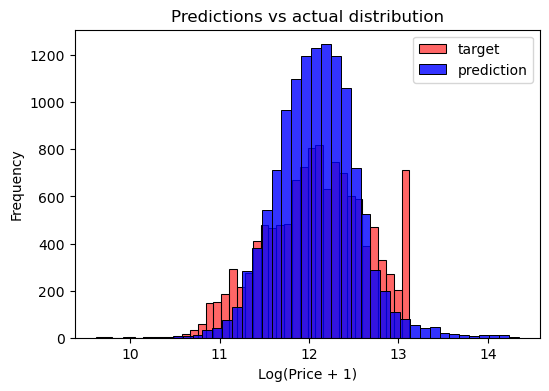

In [83]:
plt.figure(figsize=(6,4))

sns.histplot(y_train, label='target', color='red', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='blue', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [84]:
rmse(y_pred, y_train)

0.3413135910156676

evaluate the model on validation set

In [88]:
X_val.shape

(4128, 8)

In [96]:
y_pred = w_0 + X_val.dot(w)
rmse_0 = round(rmse(y_pred, y_val), 2)
rmse_0

0.33

2) fill missing values with mean

In [91]:
mean_total_bedrooms = data_train.total_bedrooms.mean()
mean_total_bedrooms

533.4803317730147

In [101]:
X_train = prepare_X(data_train, mean_total_bedrooms)
X_val = prepare_X(data_val, mean_total_bedrooms)

In [102]:
w_0, w = train_linear_regression(X_train, y_train)

In [103]:
w_0, w 

(-11.759590872710449,
 array([-2.82182103e-01, -2.76809637e-01,  2.93033801e-03, -1.48543785e-05,
         2.48054046e-04, -2.03763456e-04,  4.87004092e-04,  1.73086593e-01]))

In [104]:
y_pred = w_0 + X_train.dot(w)

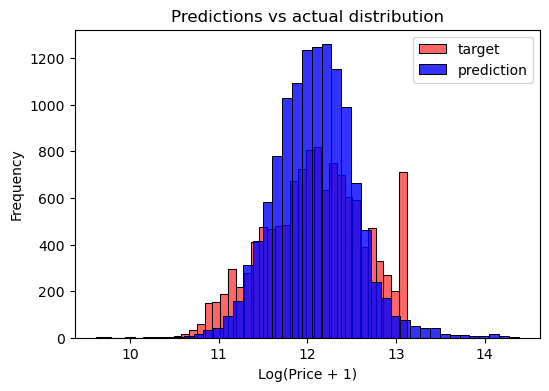

In [105]:
plt.figure(figsize=(6,4))

sns.histplot(y_train, label='target', color='red', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='blue', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [106]:
y_pred = w_0 + X_val.dot(w)
rmse_mean = round(rmse(y_pred, y_val), 2)
rmse_mean

0.33

According to rmse both ways are equally good in this case

Question 4
Now let's train a regularized linear regression.
For this question, fill the NAs with 0.
Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
Use RMSE to evaluate the model on the validation dataset.
Round the RMSE scores to 2 decimal digits.
Which r gives the best RMSE?

# Regularized model

In [111]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

data for training

In [108]:
X_train = prepare_X(data_train, 0)
X_val = prepare_X(data_val, 0)
X_test = prepare_X(data_test, 0)

In [109]:
r_values = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

In [117]:
for r in r_values:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    rmse_val = rmse(y_pred, y_val)
    print(f"r = {r}, rmse: {round(rmse_val, 2)}")

r = 0, rmse: 0.33
r = 1e-06, rmse: 0.33
r = 0.0001, rmse: 0.33
r = 0.001, rmse: 0.33
r = 0.01, rmse: 0.33
r = 0.1, rmse: 0.33
r = 1, rmse: 0.33
r = 5, rmse: 0.34
r = 10, rmse: 0.34


The smallest r value is 0

Question 5

We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.

Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].

For each seed, do the train/validation/test split with 60%/20%/20% distribution.

Fill the missing values with 0 and train a model without regularization.

For each seed, evaluate the model on the validation dataset and collect the RMSE scores.

What's the standard deviation of all the scores? To compute the standard deviation, use np.std.

Round the result to 3 decimal digits (round(std, 3))

In [118]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [120]:
scores = []
for seed in seeds:
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)
    
    data_train = data_explore.iloc[idx[:n_train]]
    data_val = data_explore.iloc[idx[n_train:n_train+n_val]]
    data_test = data_explore.iloc[idx[n_train+n_val:]]
    
    y_train = np.log1p(data_train.median_house_value.values)
    y_val = np.log1p(data_val.median_house_value.values)
    y_test = np.log1p(data_test.median_house_value.values)
    
    del data_train['median_house_value']
    del data_val['median_house_value']
    del data_test['median_house_value']
    
    X_train = prepare_X(data_train, 0)
    X_val = prepare_X(data_val, 0)
    
    w_0, w = train_linear_regression(X_train, y_train)
    y_pred = w_0 + X_val.dot(w)
    rmse_val = rmse(y_pred, y_val)
    scores.append(rmse_val)

In [125]:
std = np.std(scores)
std = round(std, 3)
std

0.004

Question 6

Split the dataset like previously, use seed 9.

Combine train and validation datasets.

Fill the missing values with 0 and train a model with r=0.001.

What's the RMSE on the test dataset?

In [126]:
idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)
    
data_train = data_explore.iloc[idx[:n_train]]
data_val = data_explore.iloc[idx[n_train:n_train+n_val]]
data_test = data_explore.iloc[idx[n_train+n_val:]]

y_train = np.log1p(data_train.median_house_value.values)
y_val = np.log1p(data_val.median_house_value.values)
y_test = np.log1p(data_test.median_house_value.values)

data_all = pd.concat([data_train, data_val])
y_all = np.concatenate([y_train, y_val])    

del data_all['median_house_value']
del data_train['median_house_value']
del data_val['median_house_value']
del data_test['median_house_value']
    
X_train = prepare_X(data_all, 0)
X_test = prepare_X(data_test, 0)
    
w_0, w = train_linear_regression_reg(X_train, y_all, r=0.001)
y_pred = w_0 + X_test.dot(w)
rmse_val = rmse(y_pred, y_test)
rmse_val

0.3453168914371051

In [129]:
rmse = round(rmse_val, 3)
rmse

0.345